<style>
*
{
	text-align: justify;
	line-height: 1.5;
	font-family: "Arial", sans-serif;
	font-size: 12px;
}

h2, h3, h4, h5, h6
{
	font-family: "Arial", sans-serif;
	font-size: 12px;
	font-weight: bold;
}
h2
{
	font-size: 14px;
}
h1
{
	font-family: "Wingdings", sans-serif;
	font-size: 16px;
}
</style>

## Data Visualization of the Population Pyramid

<!--
import data_analytics.github as github
print(github.create_jupyter_notebook_header("markcrowe-com", "data-analytics-project-template", "notebooks/notebook-2-02-example-better-code-population-dv.ipynb", "master")
-->
<table style="margin: auto;"><tr><td><a href="https://mybinder.org/v2/gh/markcrowe-com/data-analytics-project-template/master?filepath=notebooks/notebook-2-02-example-better-code-population-dv.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/></a></td><td>online editors</td><td><a href="https://colab.research.google.com/github/markcrowe-com/data-analytics-project-template/blob/master/notebooks/notebook-2-02-example-better-code-population-dv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></td></tr></table>

### Objective
This objective is to display a population pyramid with the `population-1950-2021-eda-output.csv` file.  
### Setup
Import required third party Python libraries, import supporting functions and sets up data source file paths.

In [1]:
# Local
#!pip install -r script/requirements.txt --quiet
# Remote option
#!pip install -r https://github.com/markcrowe-com/data-analytics-project-template/blob/master/notebooks/script/requirements.txt --quiet

In [2]:
from altair.vegalite.v4.api import ConcatChart
from data_analytics.graphs import display_caption
from pandas import DataFrame
from population_planning.dataframe_labels import *
from population_planning.project_manager import ProjectArtifactManager
import altair
import data_analytics.github as github
import pandas

In [3]:
artifact_manager = ProjectArtifactManager()
artifact_manager.is_remote = True
github.display_jupyter_notebook_data_sources([artifact_manager.get_population_eda_filepath()])
artifact_manager.is_remote = False

https://github.com/markcrowe-com/population-planning-data-analytics/blob/master/artifacts/population-1950-2021-eda-output.csv?raw=true


### Graph
Create Data Frame

In [4]:
def build_interactive_population_pyramid_chart(population_dataframe: DataFrame, age_field: str = "Age", population_field: str = "Population",
                                               sex_field: str = "Sex", time_field: str = "Year",
                                               male_value: str = "Male", female_value: str = "Female", male_color: str = "darkblue", female_color: str = "darkgreen",
                                               year_min: int = 1950, year_max: int = 2021, year_init: int = 2020) -> ConcatChart:
    """
    Build a interactive population pyramid chart.
    :param population_dataframe: The population dataframe to display.
    :param age_field: The age field label.
    :param population_field: The population field label.
    :param sex_field: The sex field label.
    :param time_field: The time field label.
    :param male_value: The male value defined in the sex field.
    :param female_value: The female value defined in the sex field.
    :param male_color: The male color.
    :param female_color: The female color.
    :param year_min: The min year.
    :param year_max: The max year.
    :param year_init: The initial year to start the chart with.
    :return: The interactive population pyramid Chart.
    """

    year_bind_range = altair.binding_range(
        min=year_min, max=year_max, step=1, name="Select Year")
    year_selection = altair.selection_single(bind=year_bind_range,
                                             fields=[time_field],
                                             init={time_field: year_init},
                                             name="Irish Population")
    trunk = altair.Chart(population_dataframe, title="Age"
                         ).add_selection(year_selection
                                         ).transform_filter(year_selection
                                                            ).transform_calculate(Sex=altair.datum[sex_field]
                                                                                  ).properties(width=300)

    tree_color_scale = altair.Scale(domain=[male_value, female_value], range=[
                                    male_color, female_color])

    color = altair.Color(f"{sex_field}:N", scale=tree_color_scale)
    scale = altair.Scale(domain=[0, 300.0])
    sort_order = altair.SortOrder("descending")

    x_male = altair.X(f"sum({population_field}):Q", scale=scale,
                      sort=sort_order, title="Male Population (1000)")
    x_female = altair.X(f"sum({population_field}):Q",
                        scale=scale, title="Female Population (1000)")
    y = altair.Y(f"{age_field}:O", axis=None, sort=sort_order)

    def sex_tree_lambda(value, title, x_axis): return trunk.transform_filter(altair.datum[sex_field] == value
                                                                             ).encode(color=color, x=x_axis, y=y
                                                                                      ).mark_bar().properties(title=title)

    female_tree = sex_tree_lambda("Female", "female", x_female)
    male_tree = sex_tree_lambda("Male", "male", x_male)

    y_trunk = trunk.encode(text=altair.Text(
        f"{age_field}:O"), y=y).mark_text().properties(width=20)

    return altair.concat(male_tree, y_trunk, female_tree, spacing=2)

In [5]:
population_dataframe = pandas.read_csv(artifact_manager.get_population_eda_filepath())
build_interactive_population_pyramid_chart(population_dataframe)

alt.ConcatChart(...)

<p class="Caption">Interactive Irish Population Pyramid</p>  
<a href="https://vega.github.io/editor/#/gist/f60264d419560ac188af4f6dfa5c57dd/vega-irish-population-pyramid-graph.json" target="_new"> Click here to open graph online</a>

### Observations
There is something unexpected in the data for the years 2012 to 2017 for females in the age bracket 1 to 4 years.

In [6]:
strange_values_dataframe = population_dataframe[[YEAR, AGE, POPULATION]];
strange_values_dataframe = strange_values_dataframe[( (population_dataframe[AGE] == "01-04") &
                                                      (population_dataframe[SEX] == "Female") &
                                                      (population_dataframe[YEAR] >= 2011) &
                                                      (population_dataframe[YEAR] <= 2018)
                                                    ) |
                                                    ( (population_dataframe[AGE] == "05-09") &
                                                      (population_dataframe[SEX] == "Female") &
                                                      (population_dataframe[YEAR].isin([2015, 2017, 2018]))
                                                    )]
strange_values_dataframe

,Year,Age,Population
2321,2011,01-04,138.5
2359,2012,01-04,280.7
2397,2013,01-04,277.3
2435,2014,01-04,278.7
2473,2015,01-04,279.7
2475,2015,05-09,170.8
2511,2016,01-04,281.9
2549,2017,01-04,286.8
2551,2017,05-09,176.0
2587,2018,01-04,125.8


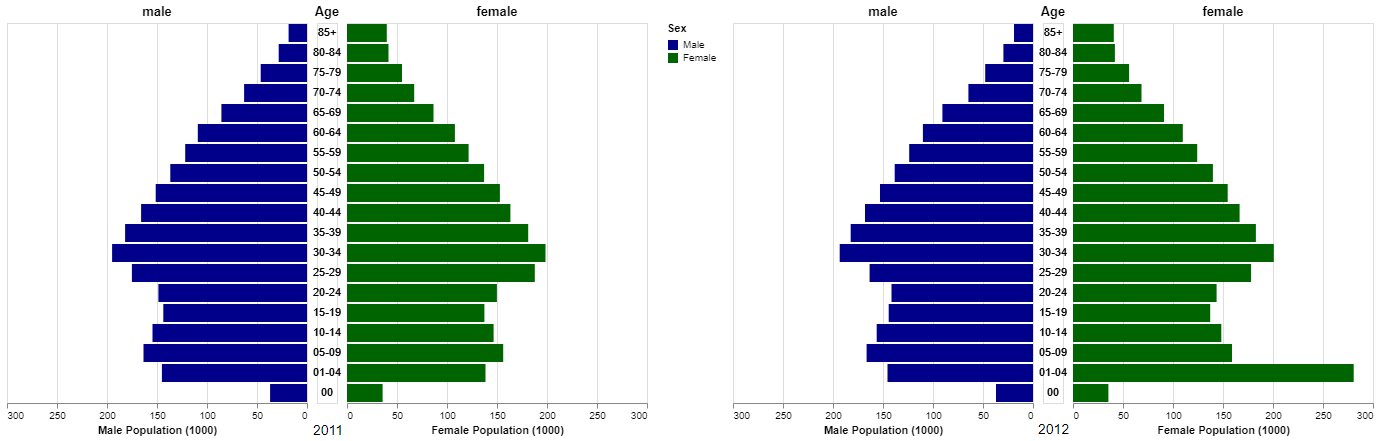
<!--![Population pyramid for years 2011 and 2012](./../artifacts/notebook-2-05-sa-population-pyramid-2011-2012.png?raw=1)-->  
<p class="Caption">Population pyramid for years 2011 and 2012</p>

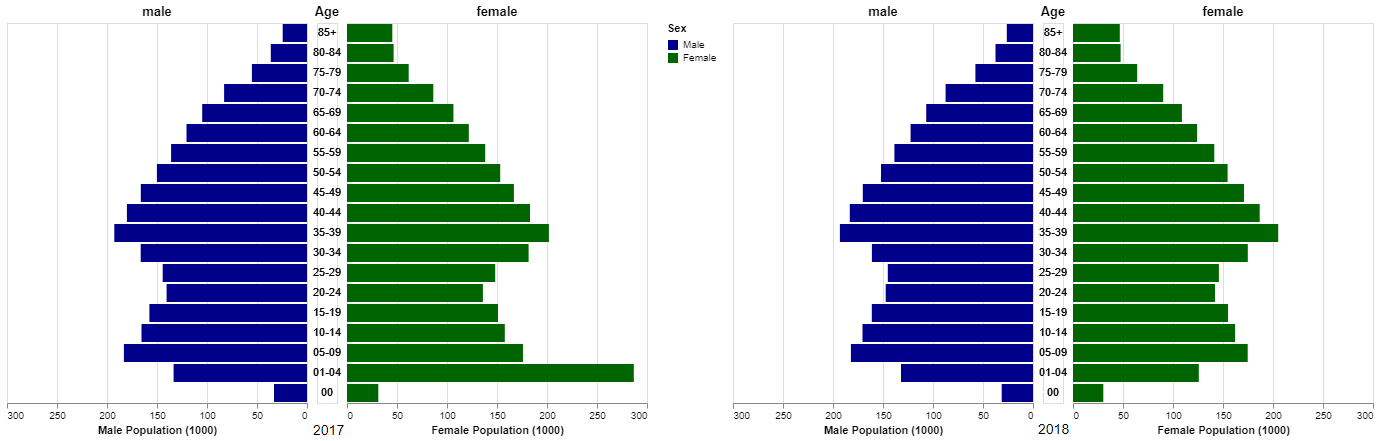
<!--![Population pyramid for years 2017 and 2018](./../artifacts/notebook-2-05-sa-population-pyramid-2017-2018.png?raw=1)-->  
<p class="Caption">Population pyramid for years 2017 and 2018</p>

After 2011 the population of females in the age bracket 1 to 4 years jumps from 138.5 thousand to 280.7 thousand without cause. This value remains in this range for the next 6 years. Then in 2018 is drops to 125.8 thousand. Also, if the numbers were accurate, we would expect that after 4 years the females in the age bracket 1 to 4 years would almost completely move into the age bracket 5 to 9 years in 2015. In 2015 the population for females in the age bracket 5 to 9 years is 170.8 thousand, 109 thousand short of the expected 280 thousand.  These 109 thousand females just disappear without cause in the records from 2018 on.

Author &copy; 2021 <a href="https://github.com/markcrowe-com" target="_parent">Mark Crowe</a>. All rights reserved.